# Renderings of the contributions to the kinetic energy from the radial and tangential motions

In [7]:
from __future__ import print_function

import matplotlib.pyplot as plt
%matplotlib nbagg
import matplotlib.colors as colors
import numpy as np
import time
import moments
import ppmpy.ppm as ppm

In [8]:
yp = ppm.yprofile("/data/ppm_rpod2/YProfiles/O-shell-M25/D2/")
moms = moments.Moments("/data/PPM/data/D2/Moms/", use_e3d=True)

In [9]:
def get_Ekr_Ekt(moms, yp, dump):
    r1D = yp.get('Y', fname=dump-1, resolution='l')
    #Rho1D = yp.get('Rho', fname=dump-1, resolution='l')
    #Rho = moms.fromradprof(r1D, Rho1D)
    Rho = moms.get("Rho", dump)
    
    rad = moments.array([moms.get("coord1(Rho)", dump), \
                         moms.get("coord2(Rho)", dump), \
                         moms.get("coord3(Rho)", dump)])
    rad_norm = rad/moments.norm(rad)
    RhoU = moments.array([moms.get("RhoUx", dump), \
                          moms.get("RhoUy", dump), \
                          moms.get("RhoUz", dump)])
    RhoUr = moments.dot(RhoU, rad_norm)
    RhoUt = moments.norm(RhoU - RhoUr*rad_norm)
    Ekr = RhoUr*RhoUr/(2.*Rho*Rho)
    Ekt = RhoUt*RhoUt/(2.*Rho*Rho)
    
    return Ekr, Ekt

def show_plots(data, vlim, ifig0):
    res = 768
    norm = colors.LogNorm(vmin=vlim[0], vmax=vlim[1], clip=True)
    interpolation = 'spline16'
    cmap = 'viridis'

    ifig = ifig0; plt.close(ifig); plt.figure(ifig, figsize=(1., 1.), dpi=res)
    plt.gca().set_position([0., 0., 1., 1.])
    idx = range(192 - 10, 192 + 10)
    img = np.sum((1e43/1e27)*data['Ekr'][:, ::-1, idx], axis=2)/len(idx)
    img = np.transpose(img)
    plt.imshow(img, norm=norm, interpolation=interpolation, cmap=cmap)
    plt.axis('off')

    ifig = ifig0 + 1; plt.close(ifig); plt.figure(ifig, figsize=(1., 1.), dpi=res)
    plt.gca().set_position([0., 0., 1., 1.])
    idx = range(192 - 10, 192 + 10)
    img = np.sum((1e43/1e27)*data['Ekt'][:, ::-1, idx], axis=2)/len(idx)
    img = np.transpose(img)
    plt.imshow(img, norm=norm, interpolation=interpolation, cmap=cmap)
    plt.axis('off')


In [10]:
data = [{}, {}, {}, {}, {}]

In [11]:
idx = 0
data[idx]['dump'] = 100

t0 = time.time()
data[idx]['Ekr'], data[idx]['Ekt'] = get_Ekr_Ekt(moms, yp, data[idx]['dump'])
t1 = time.time()
print('Data acquisition took {:.0f} s.'.format(t1 - t0))

Data acquisition took 13 s.


<IPython.core.display.Javascript object>


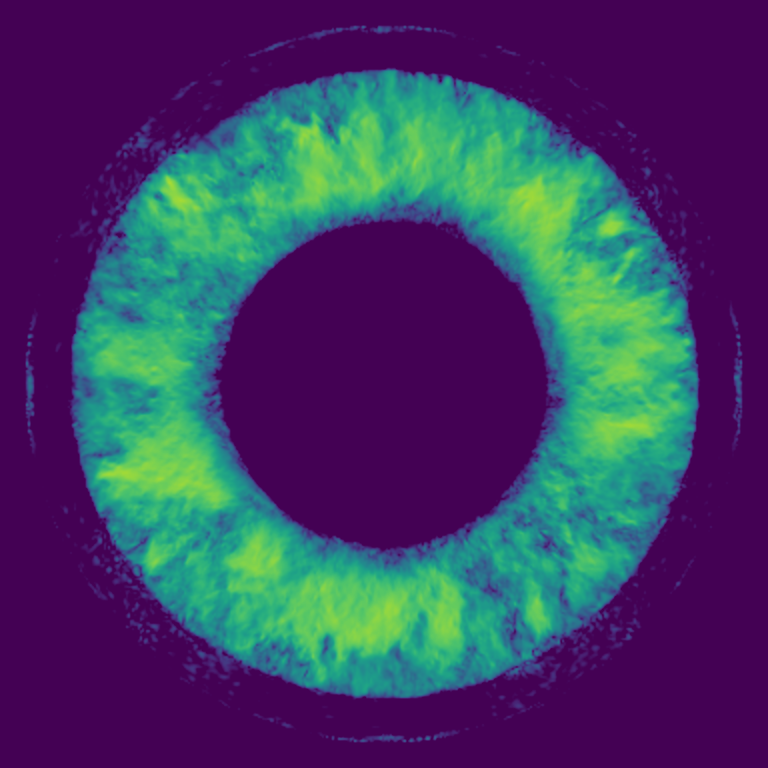

<IPython.core.display.Javascript object>


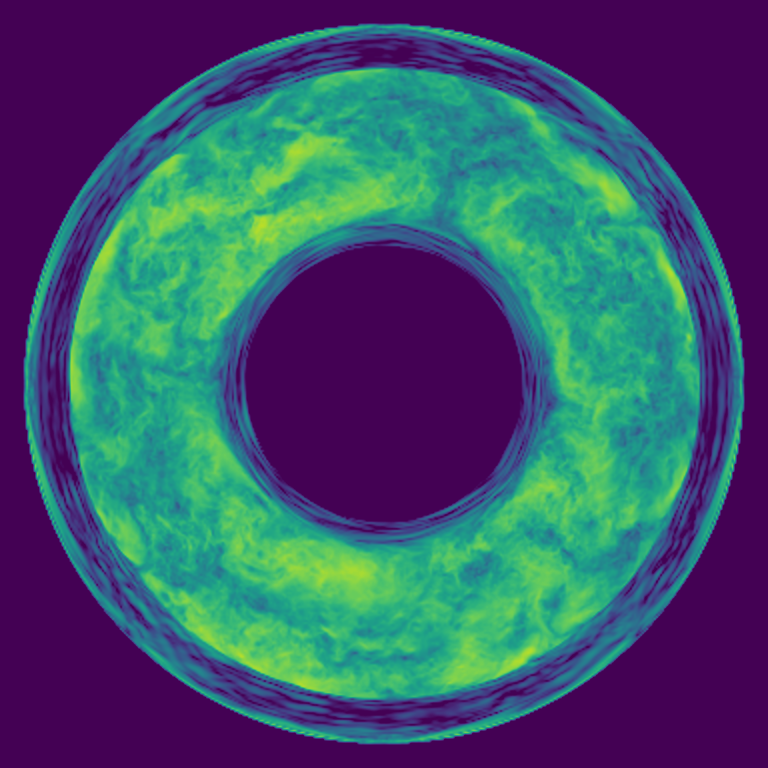

In [12]:
show_plots(data[0], (3e10, 5e13), 1)